# Neural Networks

The multi-layer neural network model as described in the README.md file will be used to predict the target, mortality caused by road traffic injury, based on features such as air pollution, pedestrian, CO2 emissions, GDP per capital, population density, quality of roads. For this neural network implementation, I will be using tensorflow and keras to evaluate how well we can predict mortality rates. Because many of these metrics are not directly related to mortality rates, it may be difficult to obtain a model that has very accurate predictions. It may be necessary to try various combinations to find features that provide general trends. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# read csv file with all country transit and socioeconomic data
df = pd.read_csv("Data/CountryData1.csv")

In [3]:
# clean up data file

# dependent variable: mortality caused by road traffic
# isolate the following independent variables:
#		PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
#		Quality of roads [value: 1 = worst to 7 = best]
#		Total world transport-related GHG emissions (million tonnes)
#		GDP per capita (current US$)
#		Fossil fuel energy consumption (% of total)
#		Individuals using the Internet (% of population)

row_ind = [2, 8, 10, 18, 20, 22, 23, 26, 28, 9]
col_filled = ~df.loc[row_ind].isin([".."]).any() # only keep countries with nonempty rows

fil_df = df.loc[row_ind, col_filled] # create new data table with isolated rows
fil_df.head()

,Unnamed: 0,Time,Time Code,Indicator Name,Indicator Code,Albania [ALB],Armenia [ARM],Australia [AUS],Austria [AUT],Bahrain [BHR],...,Switzerland [CHE],Tanzania [TZA],Trinidad and Tobago [TTO],Tunisia [TUN],Turkey [TUR],United Arab Emirates [ARE],United Kingdom [GBR],Uruguay [URY],Zambia [ZMB],Zimbabwe [ZWE]
2,2,2013,YR2013,CO2 emission from transport (of which road) re...,CO.EM.TRNS.ROAD.PPP,0.08,0.058,0.078,0.059,0.057,...,0.038,0.048,0.071,0.048,0.037,0.055,0.045,0.052,0.016,0.104
8,8,2013,YR2013,Deaths by road user category - pedestrian [%],ROAD.DTH.PEDESTRN,31.2,35.8,13.2,18,31.4,...,25.7,31.2,31.1,28.2,26.2,26.1,22.9,15.7,36.4,16.5
10,10,2013,YR2013,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,15.642,24.799,6.03,15.916,66.453,...,12.092,23.716,13.453,35.873,33.052,70.851,12.29,11.516,27.607,23.551
18,18,2013,YR2013,Quality of roads [value: 1 = worst to 7 = best],QA.ROAD.TRANS.IN,3.85,3.68,4.94,6.22,5.43,...,6.21,3.01,3.88,3.8,4.86,6.65,5.31,3.49,3.37,3.28
20,20,2013,YR2013,Total world transport-related GHG emissions (m...,EN.CO2.TRAN.ZS,2.5,1.3,90.9,22.8,3.3,...,17.1,5.5,3.2,6.1,55.9,31.5,114,3.5,1,2.8


In [4]:
# transform data file and delete time/labels for correlations
df_transposed = fil_df.T
df_transposed.columns = df_transposed.iloc[3]
df_neur = df_transposed.iloc[5:,:]
df_neur = df_neur.astype(float)
df_neur.head()

Indicator Name,CO2 emission from transport (of which road) relative to GDP (PPP) (kg per dollar),Deaths by road user category - pedestrian [%],"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Quality of roads [value: 1 = worst to 7 = best],Total world transport-related GHG emissions (million tonnes),GDP per capita (current US$),Population in the largest city (% of urban population),Fossil fuel energy consumption (% of total),Individuals using the Internet (% of population),"Mortality caused by road traffic injury (per 100,000 people)"
Albania [ALB],0.080,31.2,15.642,3.85,2.5,4413.063383,26.977777,56.53,51.8,15.0
Armenia [ARM],0.058,35.8,24.799,3.68,1.3,3680.166922,55.807632,75.51,41.9,18.0
Australia [AUS],0.078,13.2,6.030,4.94,90.9,68190.701000,22.181295,93.93,83.5,5.0
Austria [AUT],0.059,18.0,15.916,6.22,22.8,50305.354580,36.867921,66.10,80.6,5.0
Bahrain [BHR],0.057,31.4,66.453,5.43,3.3,26989.760110,33.595384,99.99,90.0,8.0


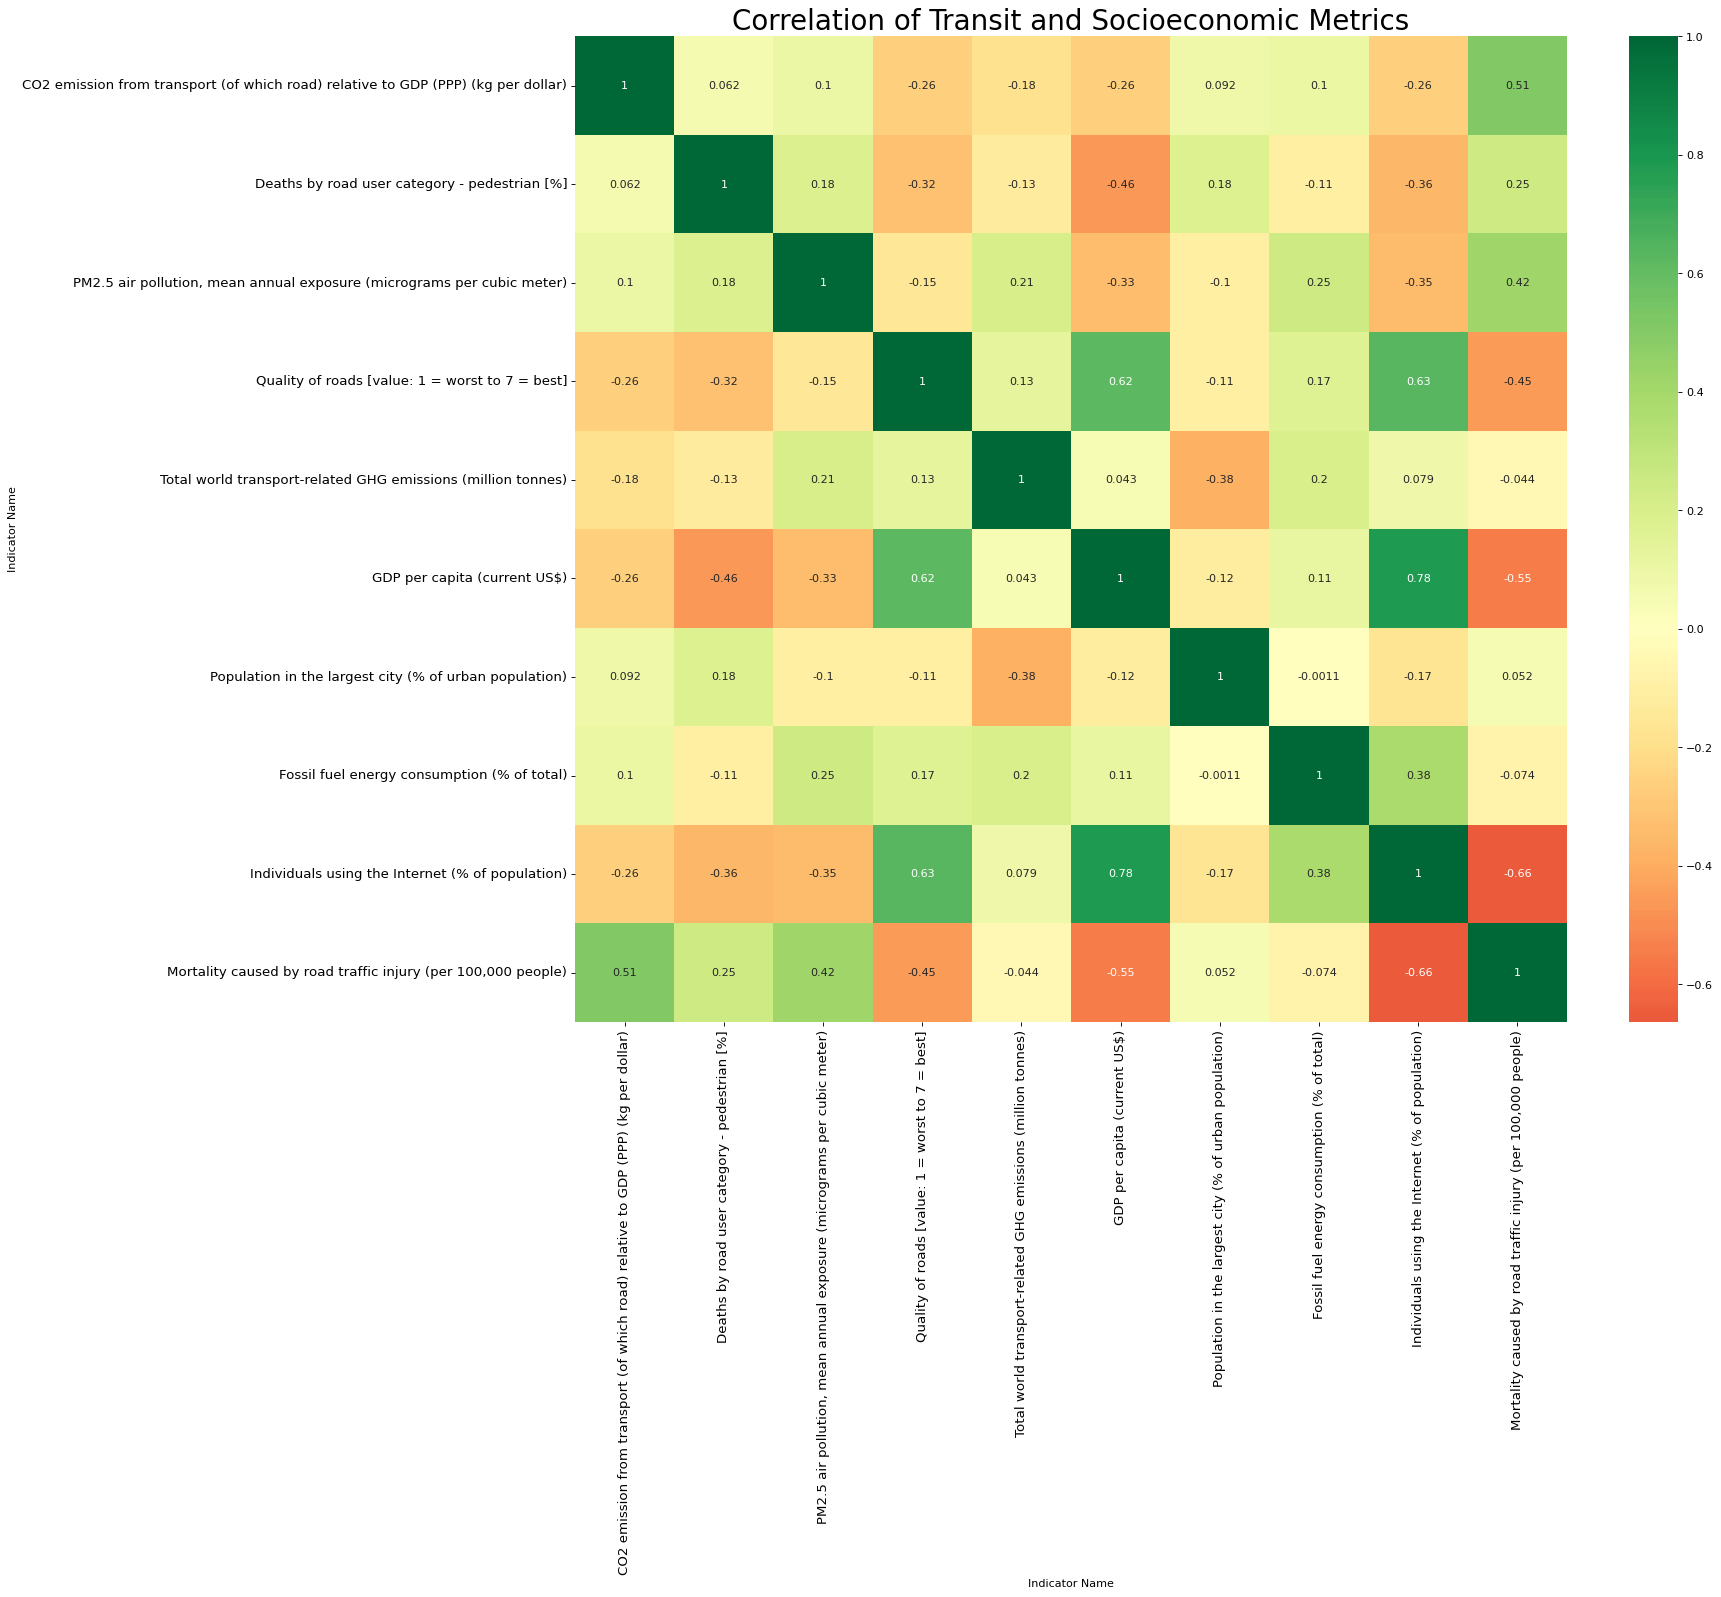

In [5]:
# plot correlation chart
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(df_neur.corr(), xticklabels=df_neur.corr().columns, yticklabels=df_neur.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation of Transit and Socioeconomic Metrics', fontsize=25)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# split X and y + train/test data

# split X and target y
X = df_neur.iloc[:,0:9]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df_neur.iloc[:,9]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

In [9]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 45.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 48.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 27.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

2025-05-06 17:18:44.222967: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-06 17:18:44.317918: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-06 17:18:44.379014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746551924.448119     473 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746551924.468839     473 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746551924.599280     473 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [11]:
neur_mod = Sequential([
    Input(shape=(9,)), # Use Input layer explicitly
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) # Output layer for regression
])

2025-05-06 17:18:51.132727: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
# compile neural network
neur_mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [ ]:
# train model
history = neur_mod.fit(X_train, y_train, epochs=100, validation_split=0.3, verbose=0)

In [ ]:
# evaluate loss and mean absolute error
loss, mae = neur_mod.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 33.5660 - mse: 33.5660
Test MAE: 33.57


In [ ]:
# predict based on test X values
y_pred = neur_mod.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


3.0
33.0


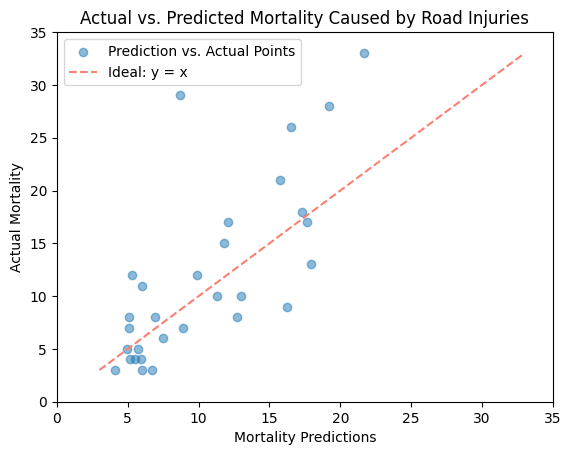

In [16]:
# actual vs. prediction on test
fig = plt.figure()
plt.scatter(y_pred, y_test, alpha=0.5, label = 'Prediction vs. Actual Points') #test data points

# plot y=x line to determine accuracy of predictions
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
print(min_val)
print(max_val)
plt.plot([min_val, max_val], [min_val, max_val], '--', color = 'salmon', label='Ideal: y = x')

plt.xlim(0,35)
plt.ylim(0,35)
plt.legend()
plt.xlabel('Mortality Predictions')
plt.ylabel('Actual Mortality')
plt.title("Actual vs. Predicted Mortality Caused by Road Injuries")
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4.07
MSE: 33.57
RMSE: 5.79
R² Score: 0.51


### Conclusion

From the comparison between actual and predicted values and well as the various error measurements, we can tell this model is not necessarily a good predictor of mortality rates. When selecting features, it is possible that there is no set of metrics that directly correlate to mortality rate in this data set. Metrics that may be better indicators include road congestion, traffic frequency, or population health data.

Additionally, the activation function and train:test size ratio were also changed to attempt to find the optimal model. The R^2 value around 0.4 or 0.5 indicates that this model is doing better than random guessing or using the mean, but it's still not good enough for high-stakes predictions or confident decision-making. The model is making noticeable errors, but is still able to provide general trends about mortality rates from the various metrics provided. It is also possible that random forests or boosting can capture the more complex relationship between these features and road mortality rates.